In [24]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
np.set_printoptions(threshold=np.nan)

pdata = pd.read_csv("../Data/preprocessed_alcohol_balance_perperson.csv")
# pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
pdata

,Conditie,SubjectID,Height,Weight,Age,BMI,Alcohol,Alcohol_Class,Balance_MLrange,Balance_MLstdev,...,Balance_APrange,Balance_APstdev,Balance_APmeanVelocity,Balance_MeanVelocity,GaitVelocity,MovementVelocity,std_SegmentData,mad_SegmentData,mean_StepLength,Velocity
0,0,6,177,70.0,20,22.343516,0.00,0,10.421641,2.753424,...,8.955034,2.367358,2.674099,4.725911,1.175792,1.187491,0.051247,0.040761,0.664377,2.191667
1,1,6,177,70.0,20,22.343516,0.00,0,16.035550,4.575012,...,11.286483,2.829856,3.584385,10.095526,0.899814,0.904473,0.040890,0.032495,0.543385,2.741667
2,0,9,195,86.0,23,22.616700,0.00,0,12.458077,2.611063,...,5.751258,1.077709,1.763952,5.022392,1.114992,1.121095,0.022745,0.019538,0.700817,2.241667
3,1,9,195,86.0,23,22.616700,0.00,0,5.465266,1.562060,...,5.522362,1.254797,2.191313,4.220501,0.895401,0.908965,0.042159,0.033549,0.497828,2.825000
4,0,10,165,65.0,28,23.875115,0.00,0,10.540746,2.647560,...,3.566472,0.860375,1.478939,4.189830,0.822858,0.855915,0.106283,0.095379,0.516998,3.133333
5,1,10,165,65.0,28,23.875115,0.00,0,9.042003,2.349159,...,5.440031,1.296242,1.937522,4.302662,0.878300,0.896931,0.061240,0.053097,0.522667,2.833333
6,0,11,179,68.0,25,21.222808,0.00,0,11.943232,3.523579,...,5.495761,1.327192,2.224658,4.336345,0.989439,1.000792,0.021762,0.018467,0.586470,2.508333
7,1,11,179,68.0,25,21.222808,0.00,0,11.049547,2.697257,...,3.329707,0.765949,1.600825,3.650951,0.873232,0.900053,0.103909,0.088957,0.445404,3.383333
8,0,13,168,70.0,18,24.801587,0.00,0,11.288707,3.137366,...,6.476372,1.759603,2.440945,4.825908,1.049215,1.053802,0.025560,0.020575,0.639974,2.383333
9,1,13,168,70.0,18,24.801587,0.00,0,16.234744,5.294132,...,11.769357,2.818343,3.640210,7.224777,0.955712,0.960144,0.049625,0.040664,0.591725,2.750000


In [25]:
X = pdata.drop(['Conditie', 'SubjectID'], axis=1)
Y = pdata['Conditie']
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=10000)
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
list(X)

Num Features: 2
Selected Features: [False False False False False False False False False False False False
 False False False  True  True False False]
Feature Ranking: [16 15 18 14 10  9 17 11  8 13 12  7  6  4  3  1  1  2  5]


['Height',
 'Weight',
 'Age',
 'BMI',
 'Alcohol',
 'Alcohol_Class',
 'Balance_MLrange',
 'Balance_MLstdev',
 'Balance_MLmeanVelocity',
 'Balance_APrange',
 'Balance_APstdev',
 'Balance_APmeanVelocity',
 'Balance_MeanVelocity',
 'GaitVelocity',
 'MovementVelocity',
 'std_SegmentData',
 'mad_SegmentData',
 'mean_StepLength',
 'Velocity']

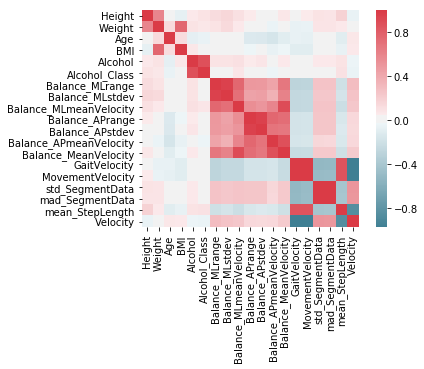

In [26]:
import seaborn as sns
corr = X.corr()
sns_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
sns_plot.figure.savefig("correlation matrix",bbox_inches="tight")

In [22]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Conditie','mean_StepLength', 'Velocity']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


In [23]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', max_iter=1000)
from sklearn.metrics import r2_score
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['norm', 'bril'],
                      title='Confusion matrix, without normalization')

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

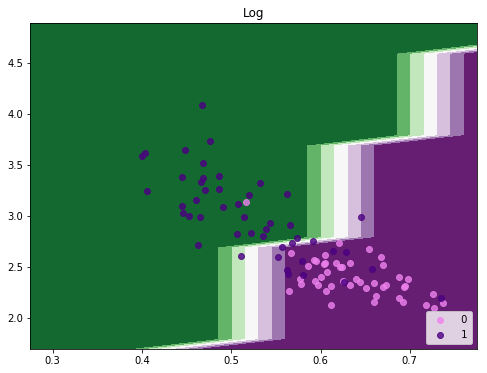

In [15]:


#Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

plt.legend(loc='lower right')
plt.title('Log')
plt.show()

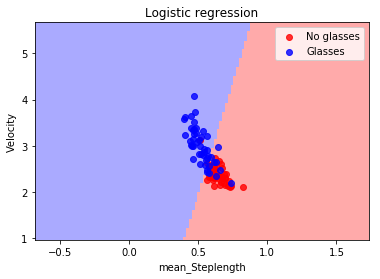

In [16]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
colors = {0: 'red', 1: 'blue'}
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)

score = logreg.score(X_test, y_test)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5, cmap=cmap_bold)

for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

colors = ['red', 'blue']
labels = ['No glasses', 'Glasses']
plt.legend(labels)
# plt.xlim(0,1)
# plt.ylim(1.5,5)
plt.title('Logistic regression')
plt.xlabel('mean_Steplength')
plt.ylabel('Velocity')
plt.savefig('Logistic regression')
plt.show()

In [17]:
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)

    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

    return accuracy_score(y_test, y_pred)*100

# accuracy = accuracy_score(y_test, y_pred)*100
# print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

make_decisions(pdata, collist)

92.5531914893617

In [11]:
#print('Accuracy Scores for different variables (mean of 100 loops):')
#print('mad_SegmentData, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mean_StepLength', 'mad_SegmentData']) for i in range(100)]), 2),'%.')
#print('mean_StepLength, std_SegmentData:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'std_SegmentData']) for i in range(100)]), 2),'%.')
print('GaitVelocity, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'GaitVelocity']) for i in range(100)]), 2),'%.')
print('Velocity, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mean_StepLength', 'Velocity']) for i in range(100)]), 2),'%.')
#print('Velocity, GaitVelocity, MovementVelocity, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'Velocity']) for i in range(100)]), 2),'%.')
#print('std_SegmentData, GaitVelocity, MovementVelocity, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'std_SegmentData']) for i in range(100)]), 2),'%.')
#print('mad_SegmentData, GaitVelocity, MovementVelocity, mean_StepLength:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'mad_SegmentData']) for i in range(100)]), 2),'%.')
#print('Velocity, GaitVelocity, MovementVelocity, mean_StepLength, std_SegmentData:', round(np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'Velocity', 'std_SegmentData']) for i in range(100)]), 2),'%.')


Velocity, mean_StepLength: 85.62 %.
Velocity, mean_StepLength: 85.24 %.
